In the excel spreadsheet, you will find a dataset containing data extracted from a corpus of Business
emails. In each row, you have the following variables:
1. **Hierarchy**: this is the ranking of the participant
of the study, either manager or employee,
2. **Speech_act**: this is the speech act of their email. Emails
can be written to request the receiver to do something, to answer a question, or to promise something
to the receiver.
3. **Frequency**: this is the total number of time the participant wrote the expression
“could you”.
4. **Total_nb_words** is the total length in number of words of the emails sent by that
participant for each speech act that week.

Using this dataset and R, answer the following questions.
For each question, please also copy-paste your R code in your answer, and the output of the R model.

####**Process of answering the question:**
- Import important libraries
- Load dataset in memory
- Create new column for the normalized frequency of "could you" per 10,000 words
- Test significance in difference of normalized frequency per Hierarchy level
- Interpretation of result
- Visualize distribution per Hierarchy level
- Test significance in difference of normalized frequency per Speech_act
- Interpretation of result
- Visualize distribution per Speech_act

### 1. **Import Libraries**

In [1]:
### import library for making graph
library(ggplot2)

### 2. **Load dataset into memory**

In [3]:
### load dataset and view it
data <- readxl::read_excel("/content/Advanced methodology exam 3EP dataset.xlsx")
View(data)

Hierarchy,Speech_act,Frequency_item,Total_nb_words
<chr>,<chr>,<dbl>,<dbl>
Manager,Request,4,318
Manager,Request,7,3981
Manager,Request,7,1181
Manager,Request,6,3166
Manager,Request,8,4838
Manager,Request,6,4581
Manager,Request,6,945
Manager,Request,9,396
Manager,Request,5,4553


### 3. **Create new column:**
Here, we create a new column of the normalized frequency of "could you" per 10,000 words
the formula:
$Normalized Frequency= (\frac{TotalNumberOfWords}{FrequencyOf"could you"})×10,000$



In [5]:
## create a new column with normalized frequency per 10000
data$normalized_freq <- (data$Frequency_item/data$Total_nb_words)*10000
View(data)

Hierarchy,Speech_act,Frequency_item,Total_nb_words,normalized_freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Manager,Request,4,318,125.786164
Manager,Request,7,3981,17.583522
Manager,Request,7,1181,59.271804
Manager,Request,6,3166,18.951358
Manager,Request,8,4838,16.535759
Manager,Request,6,4581,13.097577
Manager,Request,6,945,63.492063
Manager,Request,9,396,227.272727
Manager,Request,5,4553,10.981770


### 4. **Significance testing in Hierarchy level**
To answer question (i) by testing for whether the difference in the frequency of expression for 10000 words per hierarch level of writer is significant, we are going to use **t-test**. [Link](https://www.statology.org/welch-t-test-in-r/)

In [7]:
# Perform T-test for significant difference by hierarchy
t_test_result <- t.test(normalized_freq ~ Hierarchy, data = data)

# T-test result
t_test_result


	Welch Two Sample t-test

data:  normalized_freq by Hierarchy
t = 1.9448, df = 297.26, p-value = 0.05275
alternative hypothesis: true difference in means between group Employee and group Manager is not equal to 0
95 percent confidence interval:
 -0.104915 17.678444
sample estimates:
mean in group Employee  mean in group Manager 
              34.17062               25.38385 


### 5 **Interpretation**

T-test Results:

- T-statistic: -1.9448

- P-value: 0.0527

The p-value is slightly above the common significance threshold of 0.05, **suggesting that there is no statistically significant difference in the normalized frequency of the expression "could you" between managers and employees**.

### 6. **Appropriate plot**

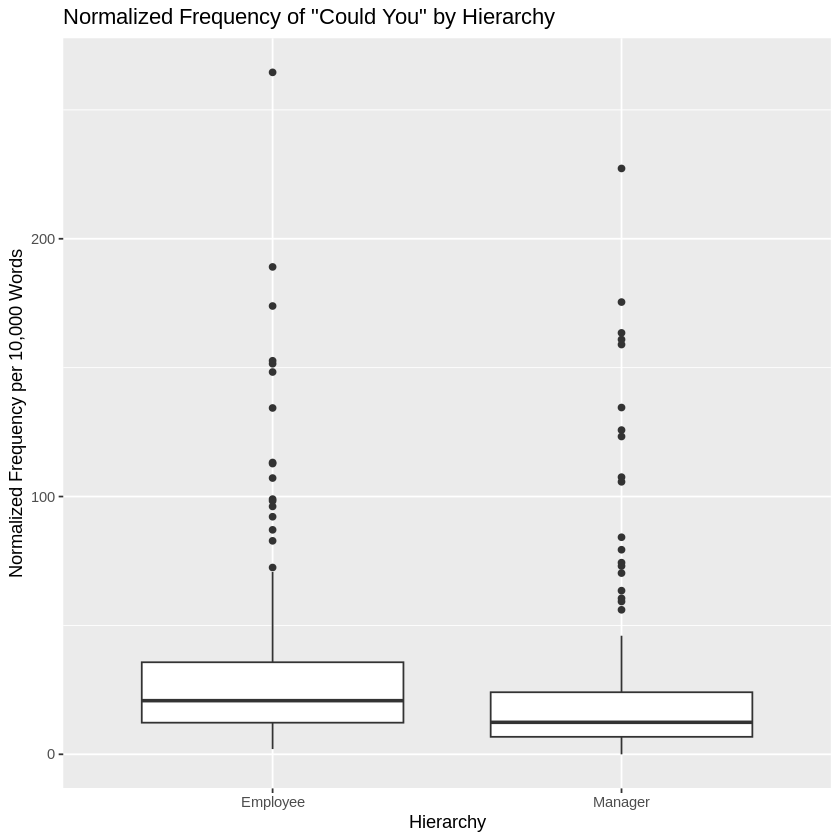

In [9]:
# Plotting Normalized_frequency distribution per Hierarchy level
ggplot2::ggplot(data, aes(x = Hierarchy, y = normalized_freq)) +
  geom_boxplot() +
  ggtitle('Normalized Frequency of "Could You" by Hierarchy') +
  ylab('Normalized Frequency per 10,000 Words')

### 7. **Significance testing in Speech_act**
To answer question (i) by testing for whether the difference in the frequency of expression for 10000 words per speech_act of the email is significant, we are going to use **ANOVA test**. [Link](https://www.statology.org/one-way-anova-r/)

In [11]:
# ANOVA for significant difference by speech act
anova_result <- aov(normalized_freq ~ Speech_act, data = data)

# ANOVA result
summary(anova_result)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Speech_act    2  85508   42754   33.72 6.34e-14 ***
Residuals   297 376535    1268                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### 8. **Interpretation**



- The **p-value (6.34e-14)** is extremely small and well below the common significance level of 0.05. This suggests that **there is a statistically significant difference in the normalized frequency of the expression "could you" depending on the speech act of the email**.
- The **F-value of 33.72** is quite large, which *further supports the conclusion that the differences in normalized frequency between the speech acts are unlikely to be due to random chance*.


### 9. **Appropriate plot**

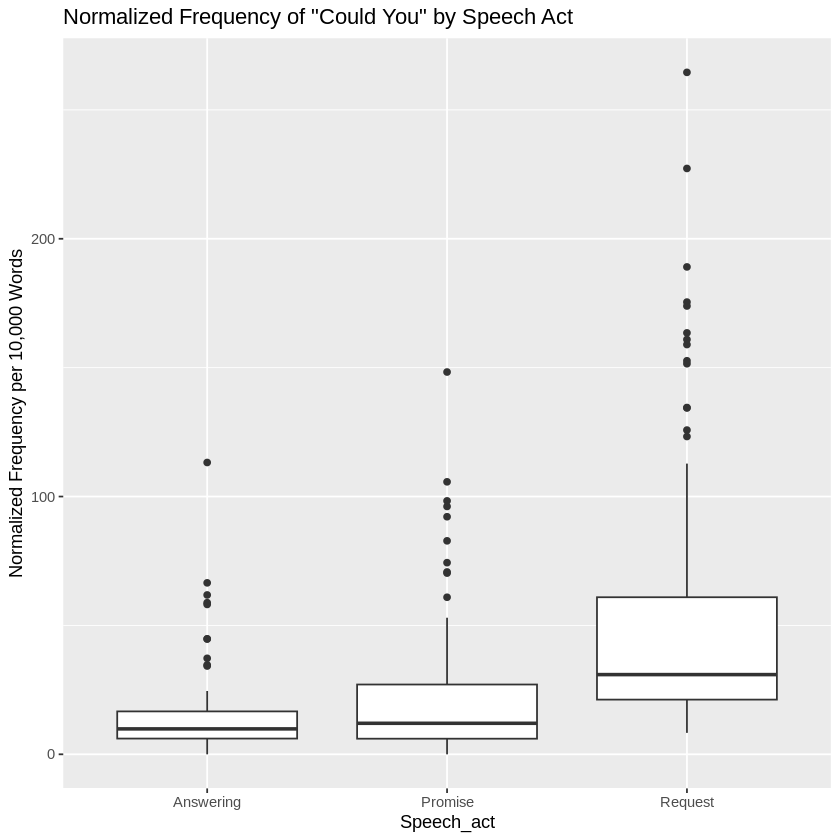

In [12]:
# Plotting the Normalized_frequency distribution per Speech_act type of email
ggplot(data, aes(x = Speech_act, y = normalized_freq)) +
  geom_boxplot() +
  ggtitle('Normalized Frequency of "Could You" by Speech Act') +
  ylab('Normalized Frequency per 10,000 Words')